---
---

#**ALGORITMOS NO SUPERVISADOS**
Docente: Paulette N. Reyes Baeza

<img src='https://cdn-icons-png.flaticon.com/512/25/25231.png' width=3%>   [Github](https://github.com/paulette-reyes)

---
---

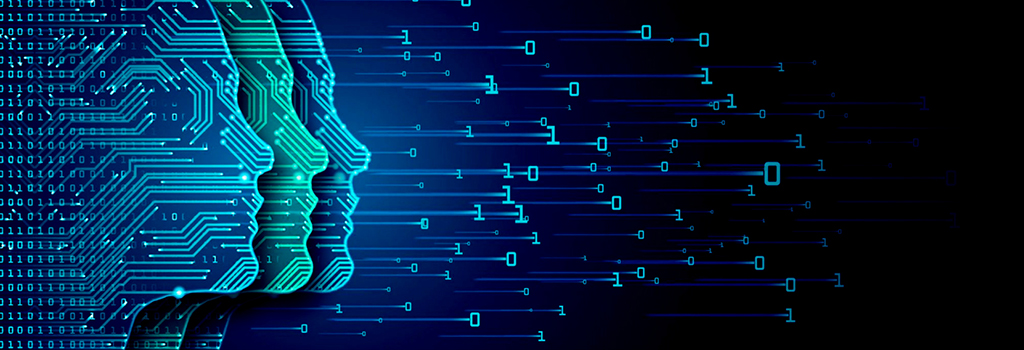

# **1. ENTENDIMIENTO DEL PROBLEMA**

**Dataset:**

Se tienen los siguientes datos de los clientes de un centro comercial: ID del cliente, la edad, el género, el ingreso anual y el puntaje de gasto. El puntaje de gasto es algo que asignas al cliente en función de parámetros definidos, como el comportamiento del cliente y los datos de compra.


**Objetivo:**

> Se necesita segmentar a los clientes del centro comercial.

**Desarrollo:**

➡️ Utilice algoritmos no supervisados para encontrar patrones en los datos.

➡️ Realice un análisis de cluster (conglomerados)




---



✅ Importar librerías básicas

In [ ]:
#Librerías básicas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings #Advertencias
warnings.filterwarnings('ignore')

✅ Cargar archivo

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name)

Saving Guia_ML_No_Supervisado.csv to Guia_ML_No_Supervisado.csv


# **2. ANÁLISIS EXPLORATORIO**

In [ ]:
df.shape

(200, 5)

In [ ]:
df.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
177,0,27,88,69
60,0,70,46,56
23,0,31,25,73
121,1,38,67,40
25,0,29,28,82
148,1,34,78,22
59,0,53,46,46
130,0,47,71,9
192,0,33,113,8
57,0,69,44,46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Análisis preliminar

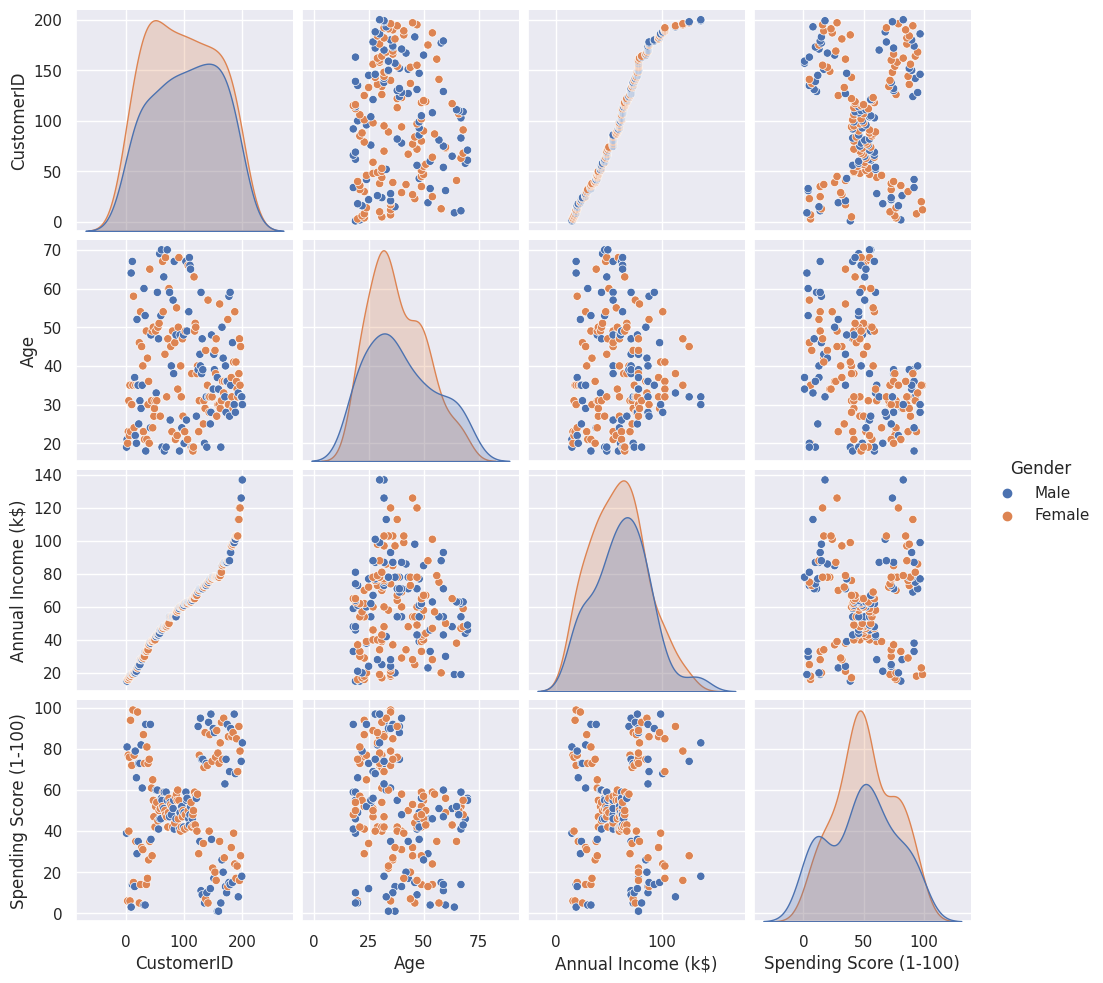

In [ ]:
# Pair-plot
sns.set()
sns.pairplot(df,hue='Gender')
plt.show()

In [ ]:
# Eliminar columnas innecesarias
df = df.drop(columns=['CustomerID'])

In [ ]:
#Valores unicos de la variable
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
#Reemplazando valores binarios
df['Gender'].replace({
    "Male":0,"Female":1
    }, inplace=True)

In [ ]:
# Nuevo df
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


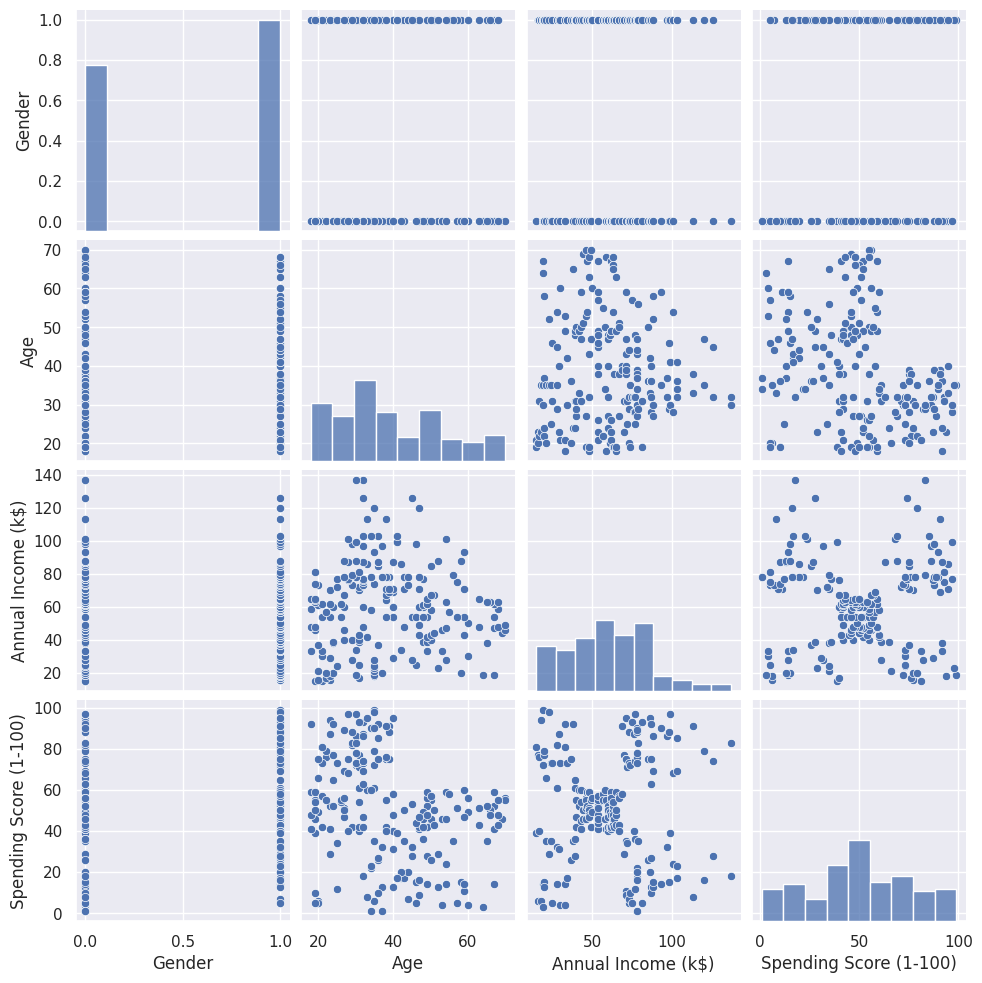

In [ ]:
# Pair-plot
sns.set()
sns.pairplot(df)
plt.show()

# **3. CLUSTERING**

El análisis de conglomerados (normalmente llamado simplemente "clustering") es un ejemplo de una tarea en la que deseamos encontrar características comunes entre conjuntos grandes de muestras.

Un algoritmo de clustering se basa en la suposición implícita de que las muestras pueden agruparse según sus similitudes.

## **3.1. K-Means**

K-Means es un método de agrupamiento que tiene como objetivo dividir un conjunto de datos en grupos (clusters) basados en la similitud entre los elementos.

➡️ `KMeans()`: El objetivo de K-Means es dividir un conjunto de datos en grupos o clusters, de modo que los puntos de datos dentro de un mismo cluster sean más similares entre sí que con los puntos de otros clusters. Es un algoritmo iterativo que asigna los datos a clusters de manera que la suma de las distancias al cuadrado entre los puntos y el centroide del cluster sea mínima.

Parámetros:

> ●   `n_clusters`: Especifica el número de clústeres (K) que se deben encontrar en el conjunto de datos. Es uno de los parámetros más importantes y generalmente se establece según el conocimiento del dominio o se determina utilizando técnicas de selección de K, como el método del codo o la silueta.

> ●   `init`: Este parámetro determina cómo se inicializan los centroides de los clústeres. Puede tomar valores como "k-means++" (inicialización inteligente predeterminada), "random" (inicialización aleatoria), o se puede proporcionar una matriz de centroides iniciales.

> ●   `n_init`: Especifica cuántas veces se ejecutará el algoritmo K-Means con diferentes centroides iniciales. Los resultados de estas ejecuciones se comparan y se selecciona el mejor clúster. El valor predeterminado es 10.

> ●   `max_iter`: Este parámetro establece el número máximo de iteraciones permitidas para converger. Si el algoritmo no converge antes de alcanzar este número de iteraciones, se detiene. El valor predeterminado es 300.

> ●   `tol`: La tolerancia para la convergencia del algoritmo. Si la diferencia entre los centroides en iteraciones sucesivas es menor que esta tolerancia, se considera que el algoritmo ha convergido. El valor predeterminado es 1e-4 (0.0001).

> ●   `precompute_distances`: Determina si se deben precalcular las distancias entre los puntos de datos y los centroides. Puede ser "auto," "True" o "False."

> ●   `random_state`: La semilla aleatoria utilizada para la inicialización de centroides. Puedes especificar un valor entero para reproducibilidad o usar "None" para una inicialización aleatoria.

---

⚠️ **CONSIDERACIONES PARA EL USO DE K-MEANS** ⚠️

•	Requiere que se indique de antemano el número de clusters que se van a crear.

•	Dificultad para detectar clusters alargados o con formas irregulares.

•	Las agrupaciones resultantes pueden variar dependiendo de la asignación aleatoria inicial de los centroides.

•	Presenta problemas de robustez frente a outliers.

---

🟠 **CÁLCULO DEL NÚMERO DE CLUSTERS (k)** 🟠

➡️ `Inertia`:  La forma más sencilla de evaluar el rendimiento de K-means y elegir un número apropiado de clusters se basa en la comparación de diferentes inercias finales. La "inercia" se refiere a una métrica que se utiliza para evaluar la calidad del agrupamiento o la dispersión de los puntos de datos en un cluster. En otras palabras, la inercia mide cuánto están dispersos los puntos de datos dentro de un cluster.

Fórmula:

```
Inertia = ∑ (Distancia Media al Centroide en cada Cluster)
```
Donde:

*   Para cada cluster en el conjunto de datos, se calcula la distancia media entre todas las muestras dentro del cluster y el centroide de ese cluster. La distancia media se calcula utilizando la distancia euclidiana, que es una medida común en el contexto de K-means. La distancia euclidiana entre dos puntos (vectores) se calcula como la raíz cuadrada de la suma de las diferencias cuadradas entre sus coordenadas.
*   Se suman todas estas distancias medias de cada cluster.
*   El resultado es el valor de la inercia.

En un buen agrupamiento, los puntos de datos dentro de un cluster deben estar cerca de su centroide, lo que da como resultado una inercia baja. Por otro lado, en un mal agrupamiento, los puntos de datos pueden estar dispersos lejos de su centroide, lo que da como resultado una inercia alta.

En resumen, la inercia es una medida que evalúa cuán compactos y cercanos están los puntos de datos dentro de un clúster, y se utiliza para ayudar a determinar el número adecuado de clústeres en un algoritmo de agrupamiento como K-Means.

➡️ `Método del codo (elbow)`: Cuando se trabaja con K-Means para determinar el número óptimo de clusters, se calcula la inercia para diferentes valores de K (número de clusters) y se busca un punto de inflexión en la curva de la inercia en función de K. El número de clusters en el que la disminución en la inercia se vuelve menos significativa puede considerarse un buen candidato para el número óptimo de clusters.

Finalmente, se escoge visualmente aquel valor para el cual la caída en la suma total de la inercia es marginal.

In [ ]:
pip install kneed

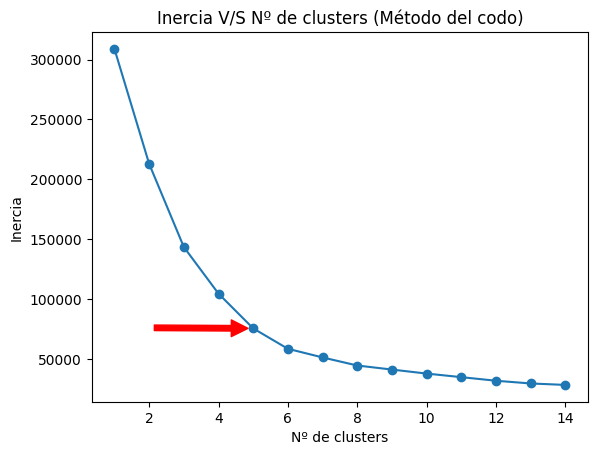

In [ ]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Calcular la inercia para diferentes números de clusters
inercia = []
for i in range(1, 15):  # Rango de clusters
    modelo = KMeans(n_clusters=i, random_state=0)
    modelo.fit(df)
    inercia.append(modelo.inertia_)

# Utilizar la biblioteca kneed para encontrar el "codo" de forma automática
kl = KneeLocator(range(1, 15), inercia, curve='convex', direction='decreasing')
codo_idx = kl.elbow

# Graficar la inercia
plt.plot(range(1, 15), inercia, marker='o')
plt.title('Inercia V/S Nº de clusters (Método del codo)')
plt.xlabel('Nº de clusters')
plt.ylabel('Inercia')

# Añadir ubicacion del codo
plt.annotate('', xy=(codo_idx, inercia[codo_idx-1]),
             xytext=(codo_idx - 3, inercia[codo_idx-1] + 500),
             arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05))

plt.show()

En este caso, el número de clusters óptimo es ***k=5***.

### **Modelo 1**

✅ Paso 1 - Selección de características (variables)

In [ ]:
#'Age' y 'Annual Income (k$)'
X = df.iloc[:, [1,2]].values

✅ Paso 2 - Modelamiento

In [ ]:
from sklearn.cluster import KMeans

modelo_1 = KMeans(n_clusters= 5, random_state=0)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_1.fit_predict(X)

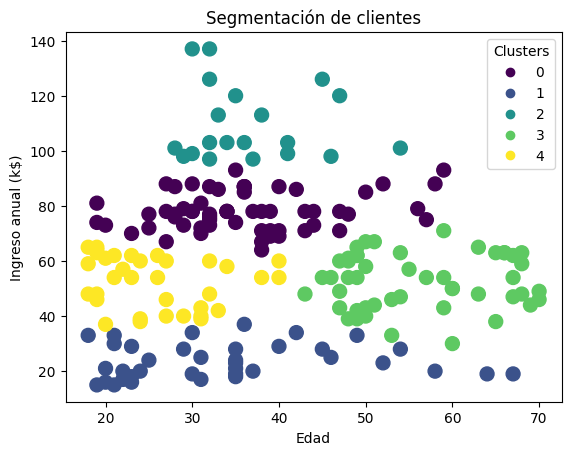

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Edad')
plt.ylabel('Ingreso anual (k$)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

Comprender el rendimiento de los métodos de aprendizaje no supervisado es inherentemente mucho más difícil que los métodos de aprendizaje supervisado porque, a menudo, no hay una solución "mejor" clara y definitiva. Para el aprendizaje supervisado, existen muchas métricas de rendimiento robustas, siendo la más directa de estas la precisión, que implica comparar las etiquetas predichas por el modelo con las etiquetas reales y ver cuántas el modelo acertó. Desafortunadamente, para el agrupamiento (clustering), no tenemos etiquetas en las que confiar y debemos desarrollar una comprensión de cuán "diferentes" son nuestros conglomerados.

➡️ `Silhouette Score()`: Medida de cuán similar es un dato a los datos de su cluster en comparación a los datos del cluster más cercano. La métrica de Silueta funciona analizando qué tan bien se ajusta un punto dentro de su conglomerado.

Fórmula:
```
S(i)= b(i)−a(i)/(max(a(i),b(i))
```
Donde:

*   S(i) es el puntaje Silhouette para el punto i.
*   a(i) es la distancia promedio de i a todos los demás puntos en el mismo clúster.
*   b(i) es la distancia promedio de i a todos los puntos en el clúster más cercano distinto del que i pertenece.

El puntaje Silhouette se calcula para cada punto en el conjunto de datos, y el puntaje Silhouette promedio se utiliza para evaluar la calidad general del agrupamiento. El puntaje Silhouette está en el rango de -1 a 1, donde un puntaje más alto indica que los puntos están bien agrupados y tienen una distancia significativamente mayor entre clusters en comparación con la distancia dentro del cluster.

• S(i) cercano a 1 = Clusters densos y bien separados. Indica que cada punto está bien emparejado con su propio clúster y alejado de los clusters vecinos.

• S(i) cercano a 0 = Los clusters pueden solaparse entre sí. Indica que el punto está en o muy cerca del límite entre dos clusters.

• S(i) es negativo = Los puntos podrían haber sido asignados al clúster incorrecto.  Indica que el punto está mal emparejado con su propio clúster y más emparejado con el cluster vecino.

También podemos utilizar puntaje Silhouette para encontrar el número óptimo de "K" conglomerados para nuestros métodos de aprendizaje no supervisado.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
SS_1 = silhouette_score(X, Y_hat)

print("Silhouette Score:",SS_1)

Silhouette Score: 0.4084065966030246


### **Modelo 2**

✅ Paso 1 - Selección de características (variables)

In [ ]:
#'Age' y 'Spending Score (1-100)'
X = df.iloc[:, [1,3]].values

✅ Paso 2 - Modelamiento

In [ ]:
modelo_2 = KMeans(n_clusters= 5, random_state=0)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_2.fit_predict(X)

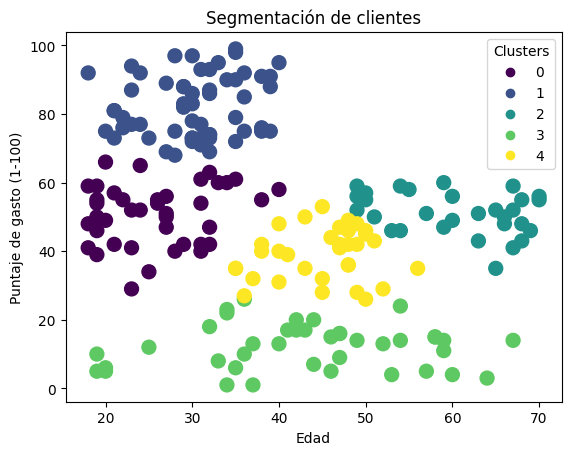

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Edad')
plt.ylabel('Puntaje de gasto (1-100)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_2 = silhouette_score(X, Y_hat)

print("Silhouette Score:",SS_2)

Silhouette Score: 0.44526667994351227


### **Modelo 3**

✅ Paso 1 - Selección de características (variables)

In [ ]:
#'Annual Income (k$)' y 'Spending Score (1-100)'
X = df.iloc[:, [2,3]].values

✅ Paso 2 - Modelamiento

In [ ]:
modelo_3 = KMeans(n_clusters= 5, random_state=0)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_3.fit_predict(X)

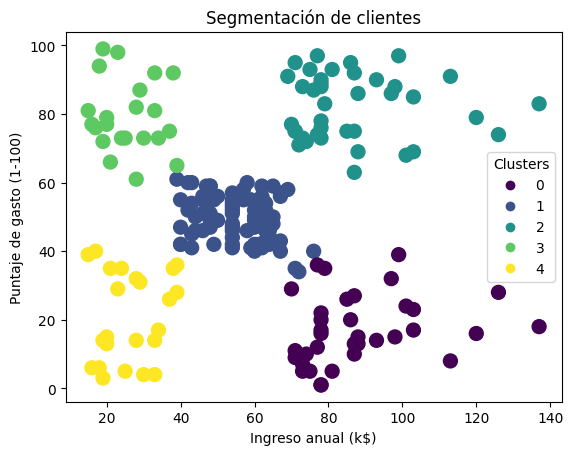

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Puntaje de gasto (1-100)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_3 = silhouette_score(X, Y_hat)

print("Silhouette Score:",SS_3)

Silhouette Score: 0.553931997444648


### **Modelo 4**

✅ Paso 1 - Selección de características (variables)

Se utilizan las mismas variables que en el modelo anterior

✅ Paso 2 - Modelamiento

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define el espacio de búsqueda de hiperparámetros, incluyendo otros hiperparámetros además de n_clusters e init
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7,9,10,11,12],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Crea un modelo K-Means
modelo = KMeans()

# Realiza una búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring=silhouette_score, n_jobs=2)
grid_search.fit(X)

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_

best_n_clusters = grid_search.best_params_['n_clusters']
best_init = grid_search.best_params_['init']
best_max_iter = grid_search.best_params_['max_iter']
best_tol = grid_search.best_params_['tol']

# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(f"Número de clústeres (n_clusters): {best_n_clusters}")
print(f"Método de inicialización (init): {best_init}")
print(f'Maximum number of iterations for each run (max_iter): {best_max_iter}')
print(f'Tolerance (tol): {best_tol}')

Mejores hiperparámetros encontrados:
Número de clústeres (n_clusters): 3
Método de inicialización (init): k-means++
Maximum number of iterations for each run (max_iter): 100
Tolerance (tol): 0.0001


In [ ]:
# Crea un modelo con los mejores hiperparámetros
modelo_4 = KMeans(**best_params, random_state=0)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_4.fit_predict(X)

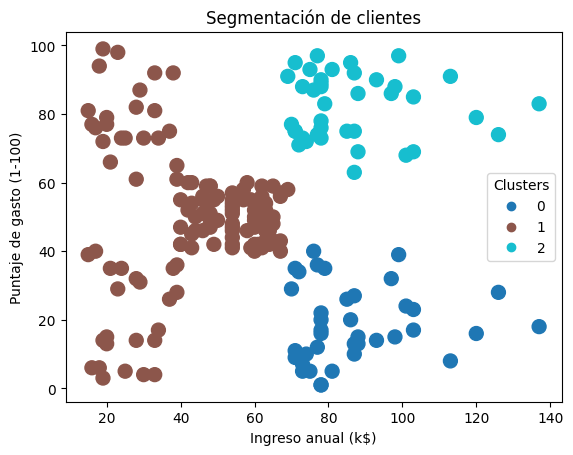

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='tab10', s=100)
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Puntaje de gasto (1-100)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_4 = silhouette_score(X, Y_hat)

print("Silhouette Score:", SS_4)

Silhouette Score: 0.46761358158775435


### **Modelo 5**

✅ Paso 1 - Selección de características (variables)

🟠 **ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)** 🟠

PCA es una técnica de reducción de la dimensionalidad en estadísticas y análisis de datos. Su objetivo principal es simplificar la complejidad en los datos, mientras se mantiene la estructura esencial y la variabilidad de los datos. PCA logra esto al transformar los datos originales en un nuevo sistema de coordenadas, donde las nuevas variables (llamadas componentes principales) son ortogonales entre sí y están ordenadas en función de la cantidad de varianza que explican.

En términos más simples, PCA te permite reducir la cantidad de variables en un conjunto de datos mientras conserva la mayor parte de la información. Esto es especialmente útil cuando trabajas con datos de alta dimensionalidad o cuando deseas visualizar datos en un espacio de dimensiones reducidas.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalización de los datos
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)

In [ ]:
from sklearn.decomposition import PCA

# Aplica PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(df_sc)

Las contribuciones de las características en las componentes principales te indican cómo cada característica original contribuye a la variación capturada por las nuevas dimensiones (componentes principales) después de la reducción de dimensionalidad con PCA.

• `Magnitud de los Coeficientes`: indica la importancia de cada característica en la componente principal correspondiente. Cuanto mayor sea el valor absoluto del coeficiente, mayor será la contribución de esa característica a la componente principal.

• `Signo de los Coeficientes`: indica la dirección de la relación entre la característica y la componente principal. Un coeficiente positivo sugiere que a medida que la característica aumenta, la componente principal también aumenta, y viceversa para coeficientes negativos.

• `Conjunto de Coeficientes`: Al observar todos los coeficientes para una componente principal, puedes identificar qué características tienen una influencia similar en esa dimensión. Características con coeficientes de magnitud similar y signo similar pueden considerarse como contribuyentes conjuntos a esa componente principal.

In [ ]:
# Obtener las contribuciones de características a las componentes principales
componentes = pca.components_

# Crear un DataFrame para visualizar las contribuciones
contribuciones = pd.DataFrame(componentes, columns=df.columns, index=['Componente 1', 'Componente 2'])
contribuciones

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Componente 1,-0.234302,0.68790,-0.006082,-0.686920
Componente 2,-0.626886,-0.10369,0.765252,0.103211


El Componente 1 esta mayormente influido por Age y Spending Score, en cambio, el Componente 2 esta compuesto principalmente por Gender y Annual Income (k$).

✅ Paso 2 - Modelamiento

In [ ]:
modelo_5 = KMeans(n_clusters=5, random_state=0)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_5.fit_predict(X_PCA)

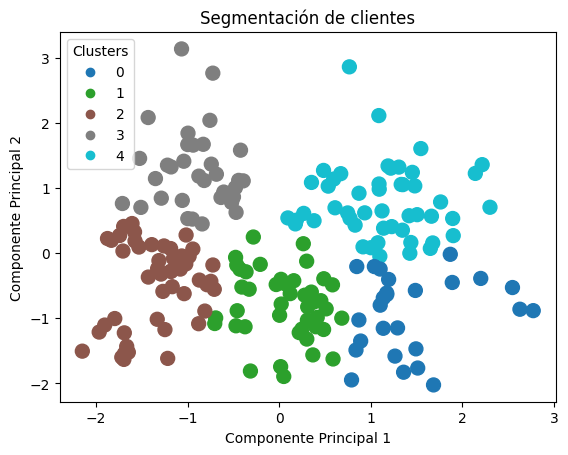

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=Y_hat, cmap='tab10', s=100)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_5 = silhouette_score(X_PCA, Y_hat)

print("Silhouette Score:", SS_5)

Silhouette Score: 0.3877934284115009


## **3.2. DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering que se utiliza para agrupar puntos de datos en clústeres en función de su densidad en el espacio. A diferencia de los algoritmos de clustering como K-Means, DBSCAN no requiere que especifiques previamente el número de clústeres, y es capaz de detectar clústeres de diferentes formas y tamaños de manera automática.

➡️ `DBSCAN`: Es un algoritmo de clustering que identifica clústeres en función de la densidad de los puntos de datos en el espacio.

Parámetros:

> ●   `eps (epsilon)`: es la distancia máxima entre dos muestras para que se consideren en el mismo vecindario. El valor predeterminado es 0.5.

> ●   `min_samples`: es el número mínimo de muestras en un vecindario para que un punto sea considerado un núcleo. El valor predeterminado es 5.

> ●   `metric`: es la métrica utilizada para medir la distancia entre las muestras. El valor predeterminado es 'euclidean', que se refiere a la distancia euclidiana.

> ●   `algorithm`:es el algoritmo utilizado para calcular las vecindades. El valor predeterminado es 'auto', que determina automáticamente el algoritmo más adecuado. Puede tomar los valores 'ball_tree', 'kd_tree' o 'brute'.

> ●   `leaf_size`: es el tamaño de la hoja para los algoritmos "ball_tree" y "kd_tree". El valor predeterminado es 30.

> ●   `p`: es el parámetro de la métrica de Minkowski. El valor predeterminado es 2, que se refiere a la distancia euclidiana.

### **Modelo 6**

✅ Paso 1 - Selección de características (variables)

In [ ]:
#'Annual Income (k$)' y 'Spending Score (1-100)'
X = df.iloc[:, [2,3]].values

# Normalización de los datos
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

✅ Paso 2 - Modelamiento

In [ ]:
from sklearn.cluster import DBSCAN

modelo_6 = DBSCAN()

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_6.fit_predict(X_sc)

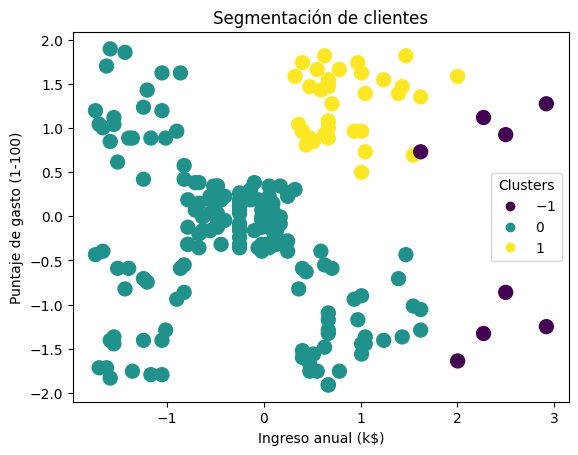

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X_sc[:, 0], X_sc[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Puntaje de gasto (1-100)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_6 = silhouette_score(X_sc, Y_hat)

print("Silhouette Score:", SS_6)

Silhouette Score: 0.35044619989666004


### **Modelo 7**

✅ Paso 1 - Selección de características (variables)

Se utilizan las mismas variables que en el modelo anterior

✅ Paso 2 - Modelamiento

In [ ]:
modelo_7 = DBSCAN(eps= 0.2, min_samples=8, algorithm='brute')

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_7.fit_predict(X_sc)

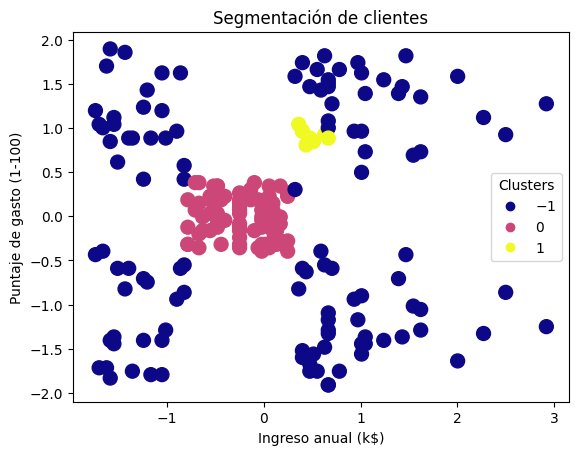

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X_sc[:, 0], X_sc[:, 1], c=Y_hat, cmap='plasma', s=100)
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Puntaje de gasto (1-100)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_7 = silhouette_score(X_sc, Y_hat)

print("Silhouette Score:", SS_7)

Silhouette Score: 0.04120506369450064


### **Modelo 8**

✅ Paso 1 - Selección de características (variables)

Se utilizan las mismas variables que en el modelo anterior

✅ Paso 2 - Modelamiento

In [ ]:
# Crea una función de puntuación personalizada basada en el Silhouette Score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    num_clusters = len(np.unique(labels))
    if num_clusters <= 1:
        return 0.0  # Evita divisiones por cero
    else:
        return silhouette_score(X, labels)

# Define la cuadrícula de hiperparámetros para ajustar
param_grid = {
    'eps': [0.1, 0.2, 0.3],
    'min_samples': [5, 10, 15],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Crea un modelo DBSCAN
modelo = DBSCAN()

# Realiza la búsqueda de hiperparámetros utilizando GridSearchCV con la función de puntuación personalizada
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring=silhouette_scorer)
grid_search.fit(X_sc)

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_
best_params

{'algorithm': 'auto', 'eps': 0.3, 'metric': 'chebyshev', 'min_samples': 5}

In [ ]:
modelo_8 = DBSCAN(**best_params)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_8.fit_predict(X_sc)

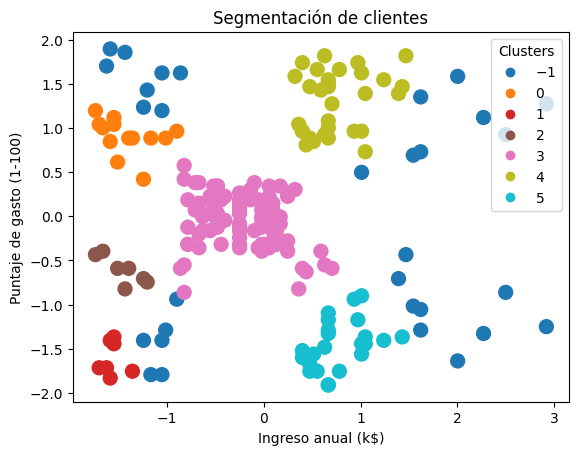

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X_sc[:, 0], X_sc[:, 1], c=Y_hat, cmap='tab10', s=100)
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Puntaje de gasto (1-100)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_8 = silhouette_score(X_sc, Y_hat)

print("Silhouette Score:", SS_8)

Silhouette Score: 0.3810186885349134


# **4. CLUSTERING JERÁRQUICO**

El clustering jerárquico es un método de agrupamiento de datos que organiza los elementos en una estructura jerárquica o de árbol, llamada dendograma. Este enfoque construye una jerarquía de grupos anidados, donde los elementos similares se agrupan en conjuntos más grandes y estos conjuntos a su vez se agrupan en conjuntos aún más grandes. Este proceso continúa hasta que todos los elementos están incluidos en un solo grupo o hasta que se alcanza un nivel deseado de granularidad. Este método es útil cuando no se conoce de antemano el número de grupos deseados y se busca explorar la estructura jerárquica de los datos.

Durante este proceso, se registra la información sobre cómo se han agrupado los elementos en cada paso, lo que puede visualizarse mediante un **dendrograma**.

➡️ `Dendrograma`: Representación gráfica de la jerarquía de grupos, presentando una estructura de árbol donde cada nodo (punto de intersección) denota un cluster. La altura en la que se fusionan dos grupos indica su nivel de similitud, mientras que las hojas (nodos terminales) son los extremos de las ramas en el dendrograma y representan grupos individuales o puntos de datos. Las conexiones (lineas) en el dendrograma reflejan cómo se agruparon los elementos en diferentes niveles jerárquicos, marcando la distancia de esas fusiones.

▶ Para hacer un dendrograma, primero hay que elegir las características o variables del dataset.

In [ ]:
#'Annual Income (k$)' y 'Spending Score (1-100)'
X = df.iloc[:, [2,3]].values

▶ Luego, hay que calcular la "matriz de enlace".

➡️ `linkage()`: La función linkage() calcula la "matriz de enlace", la cual representa la información sobre cómo los puntos o clusters se agrupan a medida que se realiza el proceso de agrupamiento jerárquico. La matriz de enlace se calcula a partir de las distancias entre los puntos y se actualiza a medida que se fusionan clusters. Cada fila en la matriz de enlace representa una fusión, y las primeras columnas presentan los identificadores de los clusters fusionados, mientras que la última columna proporciona la altura de la fusión.

Parámetros:

> ●   `method`: Método de enlace para calcular las distancias entre los clusters. 'single': enlace único (mínima distancia), 'complete': enlace completo (máxima distancia), 'average': enlace promedio, 'ward': enlace de Ward (mínima varianza intra-cluster). El valor predeterminado es 'single'.

> ●   `metric`: Métrica de distancia para calcular las distancias entre los puntos. Puede ser 'euclidean', 'manhattan','cosine', etc. El valor predeterminado es 'euclidean'.

> ●   `optimal_ordering`: Especifica si se debe aplicar un reordenamiento óptimo para mejorar la eficiencia en la construcción del dendrograma. El valor predeterminado es False.


In [ ]:
from scipy.cluster.hierarchy import linkage

# Matriz de enlace
linkage_matrix = linkage(X, method='ward')
# Especifica la distancia a utlizar en cada paso del método

▶ Finalmente se puede graficar el dendrograma usando la matriz de enlace.

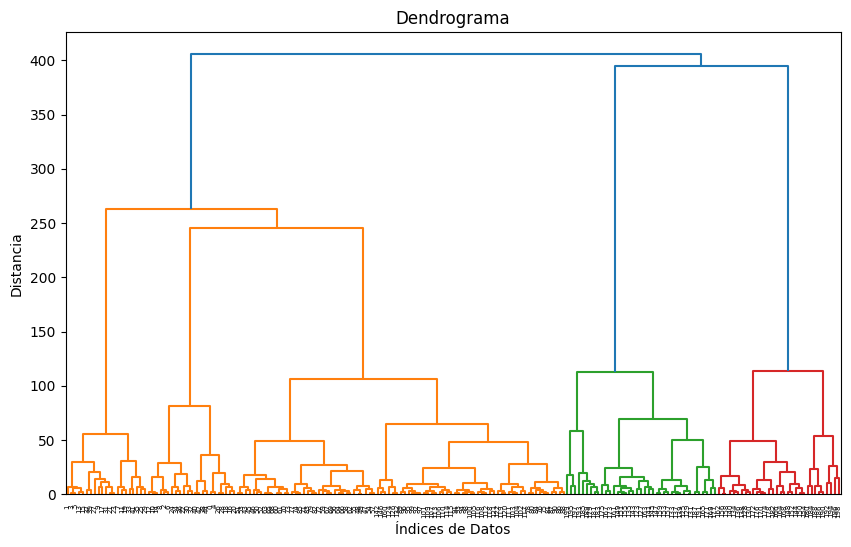

In [ ]:
from scipy.cluster.hierarchy import dendrogram

#Dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix) #grafico de dendrograma
plt.title('Dendrograma')
plt.xlabel('Índices de Datos')
plt.ylabel('Distancia')
plt.show()

Lo que buscamos en el dendrograma es encontrar el número de clusters óptimo donde está la mayor distancia vertical sin que haya una línea horizontal para hacerle un corte (representado como una linea horizontal que cruza todos los datos) y quedarnos con k clusters (donde k es el número de lineas verticales que intersectan el corte). Se recomienda buscar secciones donde las líneas verticales que conectan los nodos del dendrograma son relativamente largas y hacer el corte justo por encima de estas secciones. En este caso, las lineas más largas están por sobre la distancia de 120, y en ese punto, el corte intersecta con 5 líneas verticales por lo que se infiere que el numero de clusters óptimo es **k=5**, como puede verse a continuación:



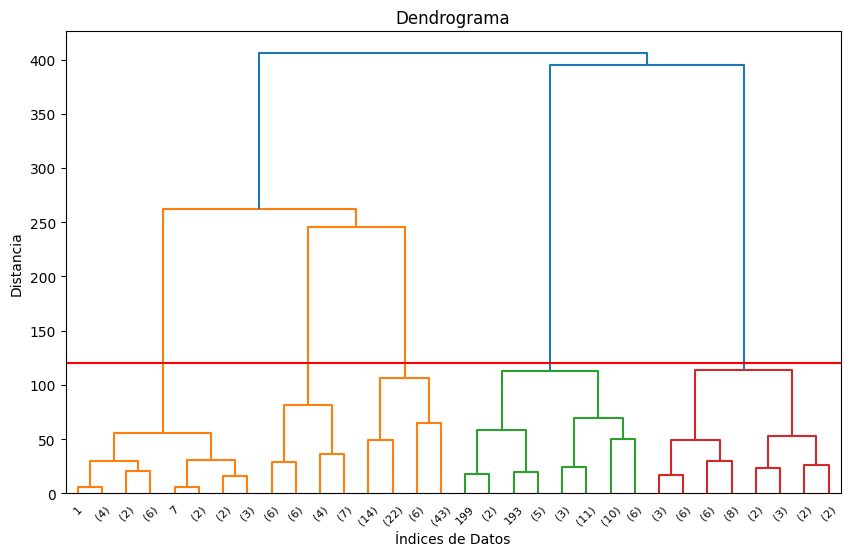

In [ ]:
#Dendrograma
plt.figure(figsize=(10, 6))

# Se ajusta el dendograma en 4 niveles para que sea más legible
dendrogram(linkage_matrix, truncate_mode='level', p=4)

# Se dibuja una linea en la distancia 120 para mostrar el corte
plt.axhline(120, c='r')

plt.title('Dendrograma')
plt.xlabel('Índices de Datos')
plt.ylabel('Distancia')
plt.show()

Una vez realizado el dendrograma se puede usar un algoritmo de clustering jerárquico aglomerativo o divisivo.

El **Clustering Jerárquico Aglomerativo** comienza considerando cada elemento como si fuera un grupo individual. En cada paso, los grupos más similares se combinan para formar grupos más grandes, fusionando gradualmente los grupos más cercanos entre sí hasta que se forme un solo gran grupo.


➡️ `AgglomerativeClustering()`: Es un algoritmo de clustering que agrupa gradualmente los puntos de datos similares, comenzando con cada punto como un cluster individual y fusionando iterativamente los clusters más cercanos.

Parámetros:

> ●   `n_clusters`: Especifica el número de clusters que se deben formar. El valor predeterminado es 2.

> ●   `affinity`: Indica la métrica de distancia utilizada para calcular la matriz de enlace. Puede ser "euclidean" (distancia euclidiana), "l1" (distancia de Manhattan), "l2" (distancia euclidiana), "manhattan" (distancia de Manhattan), "cosine" (similitud del coseno), entre otros. El valor predeterminado es "euclidean".

> ●   `linkage`: Especifica el criterio utilizado para determinar la distancia entre los conjuntos de observaciones. Puede ser "ward", "complete", "average", entre otros. "ward" minimiza la varianza dentro de los clusters. "complete" utiliza la distancia máxima entre observaciones de pares de clusters. "average" utiliza la media de las distancias entre todas las observaciones de pares de clusters. El valor predeterminado es "ward".

> ●   `distance_threshold`: Indica el umbral de similitud de las fusiones, el cual se puede utilizar para cortar el dendrograma y formar clusters. Si no se establece, el algoritmo se ejecuta hasta que todos los puntos están en un solo cluster. El valor predeterminado es None.


### **Modelo 9**

✅ Paso 1 - Selección de características (variables)

In [ ]:
#'Annual Income (k$)' y 'Spending Score (1-100)'
X = df.iloc[:, [2,3]].values

✅ Paso 2 - Modelamiento

Se usa el numero de clusters encontrado en el dendrograma:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar clustering jerárquico aglomerativo
modelo_9 = AgglomerativeClustering(n_clusters=5)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_9.fit_predict(X)

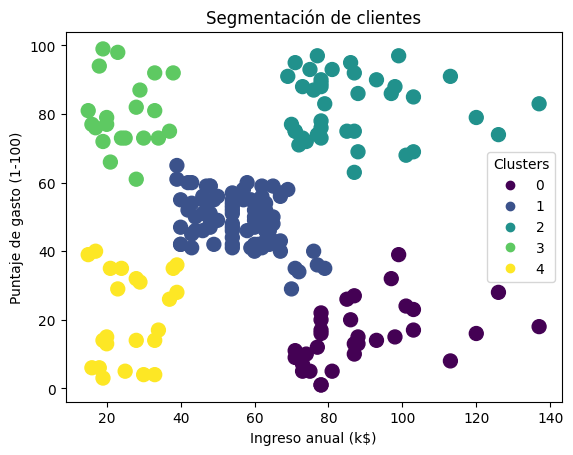

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Puntaje de gasto (1-100)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_9 = silhouette_score(X, Y_hat)

print("Silhouette Score:", SS_9)

Silhouette Score: 0.5529945955148897


### **Modelo 10**

✅ Paso 1 - Selección de características (variables)

Se usan todas las variables al igual que en el modelo anterior.

✅ Paso 2 - Modelamiento

Se puede utilizar otro método para descubrir el número de clusters definiendo un umbral de distancia minimo con el parámetro `distance_threshold`, donde el algoritmo encuentre el número de clusters óptimo. Es necesario definir n_clusters = None en este caso.

In [ ]:
# Aplicar clustering jerárquico aglomerativo
modelo_10 = AgglomerativeClustering(affinity='manhattan', linkage='average', distance_threshold=50, n_clusters=None)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_10.fit_predict(X)

In [ ]:
# Número de clusters
num_clusters = len(set(Y_hat))
print(f"Número de clusters: {num_clusters}")

Número de clusters: 7


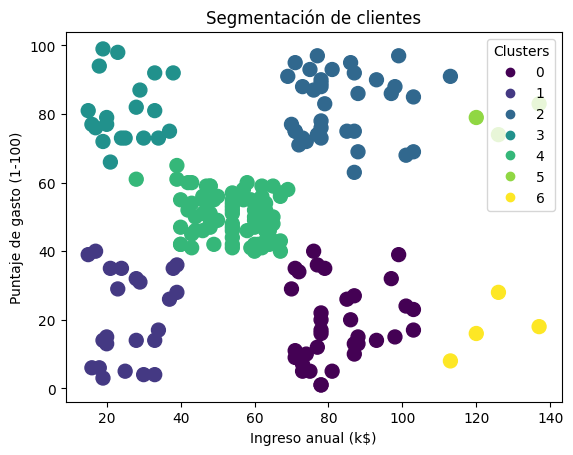

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Puntaje de gasto (1-100)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_10 = silhouette_score(X, Y_hat)

print("Silhouette Score:", SS_10)

Silhouette Score: 0.536709990876507


#**5. EVALUACIÓN**

✅ Una vez realizados todos los experimentos, se comparan los modelos para definir el modelo ganador con el que se trabajará.

In [ ]:
tabla = pd.DataFrame({'Modelo':['K-Means (Edad+Renta)','K-Means (Edad+Gasto)','K-Means (Renta+Gasto)','K-Means (GridSearch)','K-Means (PCA)','DBSCAN','DBSCAN (Manhattan)','DBSCAN (Grid Search)','Jerarquico (K=5)','Jerarquico (umbral=50)'],
                      'Silhouette Score':[SS_1,SS_2,SS_3,SS_4,SS_5,SS_6,SS_7,SS_8,SS_9,SS_10]
                      })

# Tabla resultante
tabla

,Modelo,Silhouette Score
0,K-Means (Edad+Renta),0.408407
1,K-Means (Edad+Gasto),0.445267
2,K-Means (Renta+Gasto),0.553932
3,K-Means (GridSearch),0.467614
4,K-Means (PCA),0.387793
5,DBSCAN,0.350446
6,DBSCAN (Manhattan),0.041205
7,DBSCAN (Grid Search),0.381019
8,Jerarquico (K=5),0.552995
9,Jerarquico (umbral=50),0.536710


El modelo ganador es el modelo de Clustering K-Means con 5 segmentos.

In [ ]:
import joblib

# Guardar el modelo ganador en un archivo
joblib.dump(modelo_3, 'modelo_cluster.pkl')

['modelo_cluster.pkl']

#**6. RESULTADOS**

✅ Variable de salida: Se realiza la estimación de los segmentos de clientes encontrados utilizando el modelo ganador para obtener la variable de salida $\hat Y$ (Y_hat).

In [ ]:
# Realiza la predicción de los clusters con el modelo ganador
df = pd.DataFrame(pd.read_csv('Guia_ML_No_Supervisado.csv'))
X = pd.DataFrame(df[["Annual Income (k$)","Spending Score (1-100)"]])
modelo = joblib.load('modelo_cluster.pkl')
Y_hat = modelo.fit_predict(X)
Y_hat = pd.DataFrame(Y_hat)
Y_hat

,0
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


✅ Etiquetado: Se encuentran 5 segmentos de clientes agrupados por su nivel de gasto e ingresos. Se nombra cada cluster según sus características para generar las etiquetas de cada segmento.

> *   Humilde = Ingresos bajos y Gasto bajo
> *   Aspiracional = Ingresos bajos y Gasto alto
> *   Moderado = Ingresos y Gastos moderados
> *   Tacaño = Ingresos Altos y Gasto bajo
> *   Pudiente = Ingresos Altos y Gasto alto

✅ Nuevo dataset: Se adjunta la columna resultante al dataset original para así asignarle a cada cliente la etiqueta del segmento que le corresponde

In [ ]:
# Cambiar valores numéricos de los clusters a nombres personalizados para etiquetarlos
segmentacion = {0: 'Tacaño', 1: 'Moderado', 2: 'Pudiente', 3: 'Aspiracional', 4: 'Humilde'}
Y_hat = Y_hat.replace(segmentacion)

# Agrega la predicción de clusters como una nueva columna en el DataFrame original
df['Segmento'] = Y_hat

# Nuevo df con las etiquetas de los clusters
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Segmento
0,1,Male,19,15,39,Humilde
1,2,Male,21,15,81,Aspiracional
2,3,Female,20,16,6,Humilde
3,4,Female,23,16,77,Aspiracional
4,5,Female,31,17,40,Humilde
...,...,...,...,...,...,...
195,196,Female,35,120,79,Pudiente
196,197,Female,45,126,28,Tacaño
197,198,Male,32,126,74,Pudiente
198,199,Male,32,137,18,Tacaño


In [ ]:
# Guarda el DataFrame con la nueva columna 'Cluster' como archivo
df.to_excel("clustering.xlsx", index=False)

---
---
# **DOCUMENTACIÓN**



Numpy: https://numpy.org/devdocs/user/index.html#user

Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib: https://matplotlib.org/stable/users/index.html

Seaborn: https://seaborn.pydata.org/tutorial.html

Sci-Py: https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide

Scikit-learn: https://scikit-learn.org/stable/user_guide.html

Paletas de color para gráficos (cmap): https://matplotlib.org/stable/users/explain/colors/colormaps.html